# Laboratorium 8 Page Rank
### Autor: Krzysztof Hardek

In [1]:
import networkx as nx 
import csv
import matplotlib.pyplot as plt
import numpy as np

# versions
print(nx.__version__) # 2.4
print(csv.__version__) # 1.0
print(np.__version__) # 1.18.4

2.4
1.0
1.18.4


## Zad 1 Prosty ranking wierzchołków  

### Funkcje pomocnicze:

In [2]:
# czyta graf z pliku
def read_graph(filename, delim):
    G = nx.DiGraph(name='graph')
    with open(filename, "r") as file:
        csv_reader = csv.reader(file, delimiter=delim)
        for row in csv_reader:
            s = int(row[0])
            t = int(row[1])
            G.add_edge(s, t)
        
    return G

# rysuje graf
def draw_graph(G):
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos)
    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos)

# tworzy macierz, której dominujący wektor będzie liczony    
def adj_matrix(G):
    n = len(G)
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            if (i, j) in G.edges:
               A[j][i] = 1/G.out_degree(i)
    
    return A

# metoda potęgowa
def power_iteration(A, i_max, e_min, x0):
    x0 = x0.copy()
    e = e_min + 1
    i = 0

    while i < i_max and e > e_min:
        tmp_x0 = x0
        x0 = np.dot(A, x0)
        x0 = x0 / np.linalg.norm(x0, ord=np.inf)
        e = np.linalg.norm(np.subtract(np.absolute(x0), np.absolute(tmp_x0)))
        i += 1
    
    return x0 / np.linalg.norm(x0, ord=1) #, l

# uproszczony algorytm page rank
def simple_page_rank(G, x0):
    A = adj_matrix(G)
    x0 = power_iteration(A, 1000, 10**-6, x0)
    return x0

### Grafy Testowe
#### Prosty graf z dołączonego artykułu

[0.39999994 0.19999997 0.4000001 ]


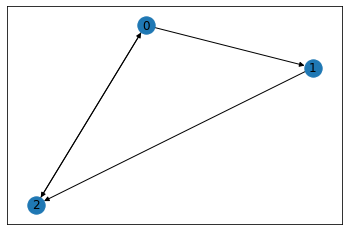

In [3]:
G = read_graph("graphs/a.csv", ",")
xg = np.ones(len(G))
print(simple_page_rank(G, xg))
draw_graph(G)

Mój wynik jest prawie taki sam jak w artykuje (różnice wynikają z użycia metody przybliżającej rozwiazanie).

#### Grafy powyżej 10 wierzchołków, silnie spójne.
Grafy stworzone zostały za pomocą funkcji gn_graph z biblioteki networkx. Zostały do tych grafów dodane ręcznie krawędzie, tak aby stały się silnie spójne  

Pierwszy Graf

True
[0.30780911 0.35004565 0.12093588 0.00729262 0.03646307 0.02917045
 0.00729262 0.11668186 0.02066242 0.00273473 0.00091158]


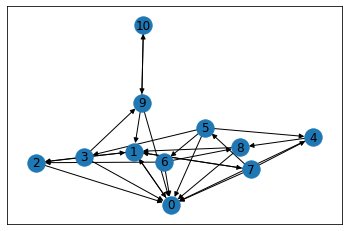

In [4]:
H = read_graph("graphs/b.csv", ",")
xh = np.ones(len(H))
print(nx.is_strongly_connected(H))
print(simple_page_rank(H, xh))
draw_graph(H)

Drugi graf

True
[0.16655564 0.01865424 0.023984   0.01199201 0.26515657 0.16922052
 0.1199201  0.023984   0.19053959 0.00333111 0.00666223]


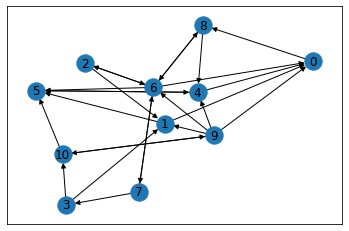

In [5]:
I = read_graph("graphs/c.csv", ",")
xi = np.ones(len(I))
print(nx.is_strongly_connected(I))
print(simple_page_rank(I, xi))
draw_graph(I)

Trzeci graf

True
[0.15017669 0.04328621 0.04946996 0.21643112 0.17226151 0.13250881
 0.07508834 0.04946996 0.04328621 0.02473499 0.04328621]


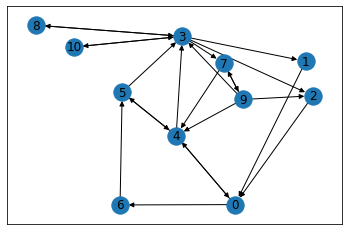

In [6]:
J = read_graph("graphs/d.csv", ",")
xj = np.ones(len(J))
print(nx.is_strongly_connected(J))
print(simple_page_rank(J, xj))
draw_graph(J)

### Wnioski

W grafach bardziej "oblegane" wierzchołki są usytuowane niżej w rankingu niż te mniej związene z grafem. Algorytm zwraca poprawne wyniki, zgodne z oczekiwaniami. Grafy muszą być silnie spójne alby nie wystąpił "rank sink" opisany w artykule. 

## Zad 2 Page Rank
### Funkcje pomocnicze

In [7]:
def page_rank(G, r0, e, d, err_min):
    err = 1
    ri_1 = r0
    I = np.identity(len(G))
    A = adj_matrix(G)
    B = d * A + np.dot((1 - d) * e, I)
    
    while err > err_min:
        ri = ri_1 / np.linalg.norm(ri_1, ord=1)
        
        ri_1 = np.dot(B, ri)
        ri_1 = ri_1 / np.linalg.norm(ri_1, ord=1)
        
        d = np.linalg.norm(ri, ord=1) - np.linalg.norm(ri_1, ord=1)
        
        ri_1 += e * d
        err = np.linalg.norm(ri_1-ri, ord=1)
    
    return ri_1 / np.linalg.norm(ri_1, ord=1)

[0.39999994 0.20000013 0.39999994]


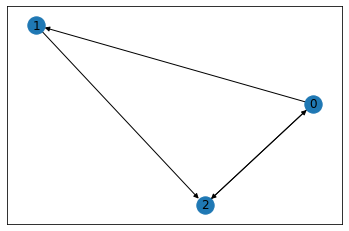

In [8]:
G = read_graph("graphs/a.csv", ",")
xg = np.ones(len(G))
e = np.ones(len(G))
e /= np.linalg.norm(e, ord=1)
d = 1
print(page_rank(G, xg, e, d, 10**-6))
draw_graph(G)

[0.20277065 0.19412132 0.09307745 0.05235212 0.06207813 0.05518055
 0.05235212 0.07780808 0.06969943 0.0815191  0.05904106]


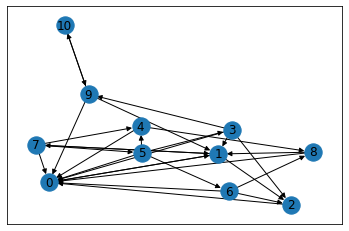

In [9]:
H = read_graph("graphs/b.csv", ",")
xh = np.ones(len(H))
e = np.ones(len(H))
e /= np.linalg.norm(e, ord=1)
d = 0.5
print(page_rank(H, xh, e, d, 10**-6))
draw_graph(H)

### Testowanie za pomocą grafów z bazy SNAP
Użyte grafy:  
    **viki-Vote**  Wikipedia who-votes-on-whom network  
    **p2p-Gnutella05**  Gnutella peer to peer network from August 5 2002  
    **p2p-Gnutella06**  Gnutella peer to peer network from August 6 2002  

In [10]:
w = read_graph("graphs/wiki-Vote.txt", "\t")
xw = np.ones(len(w))
e = np.ones(len(w))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_w = page_rank(w, xw, e, d, 10**-16)

In [12]:
for i in res_w:
    print(i)

2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00023871816352029503
2.8548108682944245e-05
2.8548108682944245e-05
0.0003522703797520938
2.8548108682944245e-05
0.0003495454779710457
2.8548108682944245e-05
0.0006227435669036609
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.004733210868306794
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00014016914479930958
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00022266097684370395
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.0019731800944206915
0.00022023566863455486
0.0002002722187915318
2.8548108682944245e-05
0.00020647625186039848
0.0003520974274834686
0.00023669441016048104
0.0010456239616449575
0.00014148246047714005
2.8548108682944245e-05
0.00021284625163840788
0.00031166555390962946
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-

0.0002637077325402083
2.8548108682944245e-05
2.8548108682944245e-05
0.00011800954288498852
2.8548108682944245e-05
2.8548108682944245e-05
6.691149451640852e-05
2.8548108682944245e-05
0.0009097077751818583
2.8548108682944245e-05
0.0002237588212844753
0.0011066894985260283
2.8548108682944245e-05
0.00015820603179709266
0.0009133811910360374
6.330582271288102e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00041919493828898526
0.00012316502975647905
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
3.12843777015672e-05
0.0010837920274131348
0.0005623351345897378
2.8548108682944245e-05
0.00020024048474360262
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.001243148757822689
0.0009710472064232391
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.

2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
7.497716297110121e-05
0.0007816234957412464
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.0004992602831306613
2.8548108682944245e-05
0.00029321894880321675
0.0007726975735836508
0.00015541458450707703
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00012258962389822016
2.8548108682944245e-05
0.0006707077088590902
0.00032097219871209413
8.802110513534127e-05
2.8548108682944245e-05
6.505835345377154e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.001109047795690669
2.8548108682944245e-05
2.8548108682944245e-

2.8548108682944245e-05
0.0003140152248170811
2.8548108682944245e-05
0.00029059758908582566
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00013485978683213225
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.00045308008026540296
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
0.0002284079024968918
7.132796903875002e-05
9.508724881447696e-05
2.8548108682944245e-05
0.00016041607925439748
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
2.8548108682944245e-05
7.854327571191757e-05
2.8548108682944245e-05
2.85481086829442

In [13]:
ptp1 = read_graph("graphs/p2p-Gnutella05.txt", "\t")
xptp1 = np.ones(len(ptp1))
e = np.ones(len(ptp1))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_ptp1 = page_rank(ptp1, xptp1, e, d, 10**-16)

In [14]:
for i in res_ptp1:
    print(i)

9.214259487421376e-05
0.00023590766065641517
4.588787518554934e-05
0.00010365893568776363
4.588787518554934e-05
0.0001577990198163897
5.137570737058382e-05
0.0003479871874999614
0.00022973687957664662
0.00013612207565948914
0.00012927928629079898
0.00026168128695629986
0.00020872646438518775
0.0002637088897555417
0.00011727613330129773
7.256431046632504e-05
0.00028564680489414805
0.00038955073514485483
7.256431046632504e-05
0.00018000024816643753
0.0009626775255720706
9.257524907462882e-05
0.00017633247753889622
7.602452186837488e-05
0.0003677704778759299
0.00017520917901009685
0.00022455264172475758
6.221774014948833e-05
0.00045557500748907127
6.221774014948833e-05
0.00018041068165917576
0.0016484885118392206
0.00014697107505820414
6.657956894364625e-05
0.00013556737798508104
9.877715308576136e-05
0.00032847261277027344
0.00015101921155073067
0.0006643305277017061
7.053223865939361e-05
0.00012385410157676616
5.451498198464725e-05
5.451498198464725e-05
7.040614031433534e-05
0.000142816

3.138949762596252e-05
6.747071871536312e-05
6.208618769439139e-05
6.210970467122581e-05
0.0001762302041016371
4.8546326161236676e-05
0.0002914506419638845
0.00023165651316711105
8.606850250273443e-05
7.189005242871974e-05
8.79147716158248e-05
8.422435161640156e-05
9.429441585443676e-05
0.0001325473690846734
0.00011465328940989202
0.0001536094201858209
9.253379809210175e-05
0.00010418915904169137
5.0293836787301744e-05
0.00019535194406862383
0.0003719013852212658
0.0001228840493230733
7.947555512090545e-05
0.0006775003423204729
0.0002914578017481293
9.625609031807978e-05
9.626955452255756e-05
7.72495611307967e-05
7.72495611307967e-05
3.138949762596252e-05
8.445235032484033e-05
7.57795847189652e-05
7.758089668273133e-05
4.880489830464685e-05
4.668105480302812e-05
5.596122153612603e-05
8.339937272905574e-05
0.00013662678281880795
3.873463000841804e-05
3.873463000841804e-05
6.348628455753374e-05
0.00019341438893143753
0.00023334963192999658
0.0002188099936574004
0.00011062268456155695
0.00

7.951677659903171e-05
9.851750668585387e-05
6.126803330878297e-05
4.760375932426731e-05
8.281561465267661e-05
5.5756819714870335e-05
4.760375932426731e-05
0.0001301915440301107
4.95904263258348e-05
0.0001391880156748721
6.770479806351615e-05
0.00012907489804872357
9.057320579309376e-05
0.00021151863534825963
0.0001371606046686269
0.00010894377903596356
4.443743653071871e-05
4.443743653071871e-05
4.443743653071871e-05
8.110863642029557e-05
0.00011423567089373283
0.00010996823177369888
0.00011553246050380113
4.696000450312587e-05
3.882650257442267e-05
5.307738423440565e-05
9.82088486723348e-05
4.471879794399798e-05
8.070216001090069e-05
8.704484509529969e-05
0.00010014039057750052
0.00021090984161172672
0.0001899257478168248
5.6912202391878186e-05
0.00020708744700700062
4.0210969296388856e-05
5.079688534828022e-05
0.00021090982962045177
5.079688534828022e-05
0.00027081498969749873
9.518597905121365e-05
0.00020955748518494476
8.213826516441914e-05
6.459240132252226e-05
4.8330322304212744e

4.725020681729374e-05
4.330621403216572e-05
6.484900366761056e-05
4.750420907740284e-05
4.750420907740284e-05
5.4538461600272815e-05
5.75476147335798e-05
4.878418874256742e-05
0.00012425098310642313
8.640149160656224e-05
5.8214966311194244e-05
0.00014805718215574746
6.868745709825163e-05
4.60938506684231e-05
7.161508977253013e-05
5.964830409982043e-05
0.00012050890567541261
8.630325830615062e-05
4.0858016499888154e-05
4.0858016499888154e-05
4.0858016499888154e-05
6.09601069331519e-05
4.4514731933338876e-05
0.00015587451162201856
4.735235753291952e-05
4.303019618241404e-05
7.378914563958929e-05
4.909742256752244e-05
7.001935626298642e-05
6.0379888569158024e-05
0.00010242165279969504
0.00012056011240232422
0.00012056011240232422
0.00012056011240232422
9.360864826731208e-05
4.876657569805753e-05
4.876657569805753e-05
9.21943641456854e-05
5.1973844842016514e-05
3.869573051872727e-05
3.869573051872727e-05
3.869573051872727e-05
3.869573051872727e-05
3.869573051872727e-05
3.869573051872727e-0

In [15]:
ptp2 = read_graph("graphs/p2p-Gnutella06.txt", "\t")
xptp2 = np.ones(len(ptp2))
e = np.ones(len(ptp2))
e /= np.linalg.norm(e, ord=1)
d = 0.85
res_ptp2 = page_rank(ptp2, xptp2, e, d, 10**-16)

In [16]:
for i in res_ptp2:
    print(i)

8.035570419178943e-05
8.402762404406913e-05
0.0001477457906267216
0.0002604864878011946
0.00011293034029031033
0.0002156960441669248
0.00020419552897905983
0.0004336790490249481
0.00021804397153781175
7.466228465384882e-05
0.0001506379967918618
9.541672250393382e-05
0.0001227699776916383
0.001012841410721724
4.564502468774819e-05
0.00033690481389807666
6.303247420955813e-05
0.0003362210784609566
0.00014058377417707334
0.0002295184521124526
0.000606105989544938
0.00028766470244412796
0.00014972217830378317
0.00011503145834549383
7.940872296526331e-05
0.0001036749425517933
0.00048551982018138213
0.0004079830360476249
7.688624326340762e-05
5.651625779820787e-05
0.00014605647954502631
0.0018694888247457072
0.0004210062975137997
9.55392681521389e-05
0.0002514281196614465
0.0005516652582027538
0.00011696135187546486
0.00016037861963733062
0.0003269445707128207
0.0006221007091250085
0.0004919570285890339
9.55392681521389e-05
0.0002434816503754951
6.502584956017294e-05
0.00039485384299996125
7

5.0003086642689505e-05
0.00015956274852783143
0.00011105412138185468
3.807965902529053e-05
0.00012510808558917382
7.454256077396615e-05
5.165002739671231e-05
0.00015634432519294735
0.00028329648624731725
0.0001926030044443247
3.685853511832627e-05
0.00022098092240149228
3.698223480105339e-05
4.278818986074127e-05
0.00039606850531092794
6.521571423935031e-05
3.669036280683221e-05
0.00015007157783558772
0.00018698798506674923
0.00017093053734513973
0.00017420612159801542
6.012739931811267e-05
0.000227278951328055
0.00010236756235987701
8.737175651159844e-05
0.00026510592557512324
0.00020739190446078857
0.00010467872793830282
0.00018329067555054282
9.728556884394413e-05
9.658235257408748e-05
9.193691116653416e-05
9.467890634220173e-05
0.00013823004155920666
9.30590670160445e-05
5.3529590175597156e-05
4.44697724384043e-05
0.00015193224213092612
0.00011605986273284214
8.014752750502346e-05
0.00010435979449279731
0.00010600637731629744
0.00010656952918451107
3.9680123629338185e-05
0.00013682

0.00012327601193930929
0.00010084264080314524
0.00011192509864665945
9.470811545723722e-05
7.3606202032735e-05
9.872338982011787e-05
0.00011513775185276388
9.641732530016131e-05
0.0002209655998909505
0.0001177443999134116
6.299477289127737e-05
7.396898739085901e-05
3.239375124935975e-05
9.739752598730001e-05
6.269272247557165e-05
3.239375124935975e-05
3.824526979425141e-05
0.00016851809893334558
3.239375124935975e-05
6.903723226754383e-05
3.239375124935975e-05
3.239375124935975e-05
8.415530114725341e-05
3.239375124935975e-05
3.239375124935975e-05
3.239375124935975e-05
4.967279972725595e-05
3.239375124935975e-05
0.00018170118683333552
7.286484992003214e-05
6.680603234022723e-05
0.00020198011122493927
5.31546662529111e-05
0.00012270182699352267
4.747352569581601e-05
9.233744171229809e-05
0.00036020516120249785
0.0001622191163092473
4.8909497846336485e-05
9.476398533043152e-05
0.0001428134093070564
7.538340958406841e-05
0.00020269186087898283
6.519979395259404e-05
0.00022226459250901596
0

0.00021288645942571158
3.925026521316432e-05
5.437054184399348e-05
6.960032823083158e-05
6.15068571863398e-05
5.196086063201105e-05
4.37989172957437e-05
4.37989172957437e-05
4.37989172957437e-05
5.4123890412881756e-05
5.24428054710966e-05
6.62795227511808e-05
5.2488331014523364e-05
5.2488331014523364e-05
5.2488331014523364e-05
5.169449628778002e-05
0.0001242043058539787
4.802473914009987e-05
5.3033333204959445e-05
3.805551798415475e-05
3.805551798415475e-05
3.805551798415475e-05
6.21862202610567e-05
6.178219613623387e-05
4.8356801935942825e-05
4.413026481235049e-05
4.413026481235049e-05
4.413026481235049e-05
4.080524021046216e-05
4.080524021046216e-05
8.592975127585244e-05
0.00010763612072457214
6.948759458673581e-05
5.92584406926973e-05
6.360155106170723e-05
5.2187319151486584e-05
4.580563335480518e-05
7.469853626373684e-05
0.00016571905297986376
0.0001629065251966238
4.851403689311736e-05
4.7111945767734483e-05
7.814513246984917e-05
7.814513246984917e-05
4.565887837475395e-05
5.97626